In [27]:
import pandas as pd
from pandasai import Agent
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("student.csv")
data.head()

,Unnamed: 0,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [8]:
data.dtypes

Id                     int64
Student_Age            int64
Sex                   object
High_School_Type      object
Scholarship           object
Additional_Work       object
Sports_activity       object
Transportation        object
Weekly_Study_Hours     int64
Attendance            object
Reading               object
Notes                 object
Listening_in_Class    object
Project_work          object
Grade                 object
dtype: object

In [16]:
data.isnull().sum()

Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [18]:
data.replace('None', np.nan, inplace=True)

/var/folders/1v/1ld850bs4z72md73h9k5ks2m0000gn/T/ipykernel_35193/1849851247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


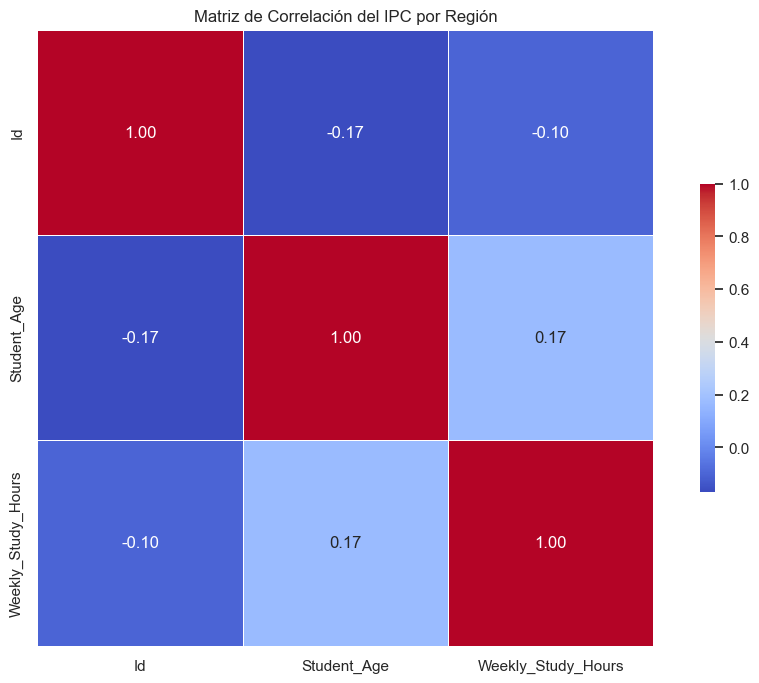

In [14]:
matrix = data.corr()
sns.set_theme(style="white")

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlación del IPC por Región')
plt.show()

## Identificamos las variables categoricas

In [15]:
data.head()

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


In [19]:
categoricas = data[['Sex', 'High_School_Type', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']]
numericas = data[['Id', 'Student_Age', 'Weekly_Study_Hours']]
categoricas.head()

,Sex,High_School_Type,Additional_Work,Sports_activity,Transportation,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,Male,Other,Yes,No,Private,Always,Yes,Yes,No,No,AA
1,Male,Other,Yes,No,Private,Always,Yes,No,Yes,Yes,AA
2,Male,State,No,No,Private,Never,No,No,No,Yes,AA
3,Female,Private,Yes,No,Bus,Always,No,Yes,No,No,AA
4,Male,Private,No,No,Bus,Always,Yes,No,Yes,Yes,AA


In [23]:
for var in categoricas:
    print(var, ' tiene ', len(data[var].unique()), ' etiquetas')

Sex  tiene  2  etiquetas
High_School_Type  tiene  3  etiquetas
Additional_Work  tiene  2  etiquetas
Sports_activity  tiene  2  etiquetas
Transportation  tiene  2  etiquetas
Attendance  tiene  4  etiquetas
Reading  tiene  2  etiquetas
Notes  tiene  3  etiquetas
Listening_in_Class  tiene  3  etiquetas
Project_work  tiene  2  etiquetas
Grade  tiene  8  etiquetas


### Separamos el dataset

In [26]:
X = data.drop(['Grade', 'Id'], axis = 1)
y = data['Grade']

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)